In [1]:
import ROOT as R
from util import *
from analysis_branch import *
import os

ERROR in cling::CIFactory::createCI(): cannot extract standard library include paths!
Invoking:
  LC_ALL=C x86_64-conda-linux-gnu-c++   -DNDEBUG -xc++ -E -v /dev/null 2>&1 | sed -n -e '/^.include/,${' -e '/^ \/.*++/p' -e '}'
Results was:
With exit code 0


Welcome to JupyROOT 6.24/02


In [2]:
R.EnableImplicitMT()

In [3]:
path = './Pre_SlimmedSignal'
norm_path = '/data/pubfs/zhanglic/workspace/VHH4bAnalysisNtuples/2022/2018'
string_list_for_ZHH   = []

In [6]:
model = R.RDF.TH1DModel('boostedCategory', 'boostedCategory', 5, 0, 5)

In [7]:
for _file in file_list_ZHH:
    if 'ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0' in _file:
        for _root in os.listdir('{0}/{1}/'.format(norm_path,_file)):
            string_list_for_ZHH.append('{0}/{1}/{2}'.format(norm_path,_file,_root))
            
        rdf_dict[_file] = R.RDataFrame('Events',string_list_for_ZHH)
        histo_dict[_file] = rdf_dict[_file].Filter('isZee==1||isZmm==1').Histo1D(model,'boostedCategory')

0.0
157270.0
30820.0
1955.0
8040.0
970.0
130.0


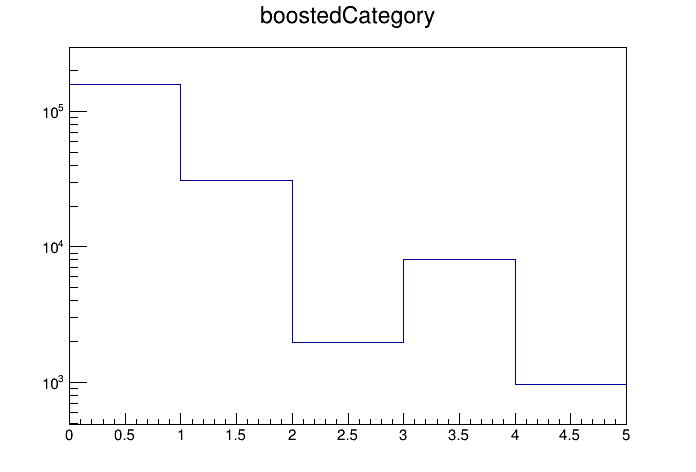

In [19]:
c = R.TCanvas()
c.SetLogy()
R.gStyle.SetOptStat(0000)
histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0'].Draw('histo')
for i in range(0,7):
    print(histo_dict['ZHHTo4B_CV_1_0_C2V_1_0_C3_1_0'].GetBinContent(i))
c.Draw()

In [8]:
string_list_for_DY=[]

In [9]:
for _file in file_list_DY:
    for _root in os.listdir('{0}/{1}/'.format(norm_path,_file)):
        if 'temp' in _root:
            continue
        string_list_for_DY.append('{0}/{1}/{2}'.format(norm_path,_file,_root))   
rdf_dict['DY'] = R.RDataFrame('Events',string_list_for_DY)
histo_dict['DY'] = rdf_dict['DY'].Filter('isZee==1||isZmm==1').Histo1D(model,'boostedCategory')

0.0
584549.0
285781.0
916008.0
78711.0
224221.0
523.0


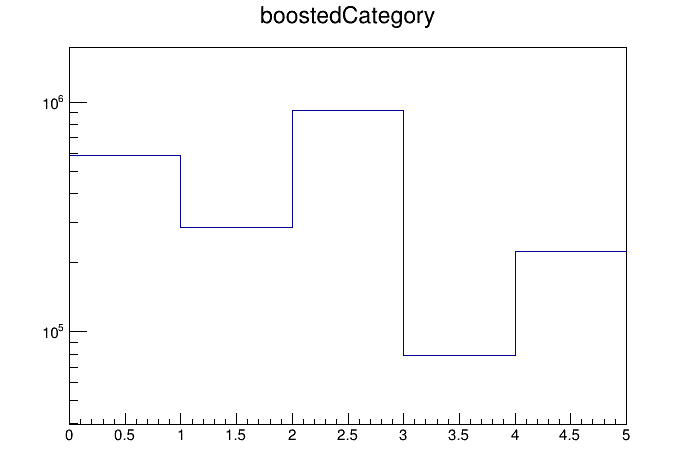

In [10]:
c = R.TCanvas()
c.SetLogy()
R.gStyle.SetOptStat(0000)
histo_dict['DY'].Draw('histo')
for i in range(0,7):
    print(histo_dict['DY'].GetBinContent(i))
c.Draw()

In [13]:
string_list_for_TT=[]

In [14]:
for _file in file_list_for_TT:
    for _root in os.listdir('{0}/{1}/'.format(norm_path,_file)):
        string_list_for_TT.append('{0}/{1}/{2}'.format(norm_path,_file,_root))   
rdf_dict['TT'] = R.RDataFrame('Events',string_list_for_TT)
histo_dict['TT'] = rdf_dict['TT'].Filter('isZee==1||isZmm==1').Histo1D(model,'boostedCategory')

0.0
2109838.0
205175.0
83157.0
28058.0
18652.0
51.0


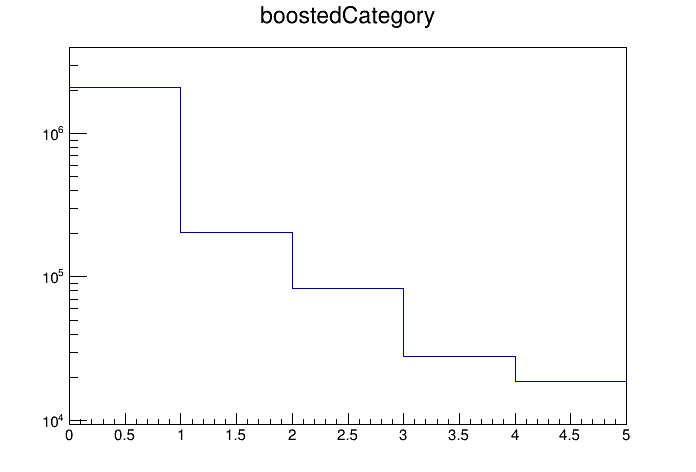

In [15]:
c = R.TCanvas()
c.SetLogy()
R.gStyle.SetOptStat(0000)
histo_dict['TT'].Draw('histo')
for i in range(0,7):
    print(histo_dict['TT'].GetBinContent(i))
c.Draw()